In [2]:
# importing Library 
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Path to get files
current_dir = os.getcwd()
relative_path = "Study_2_data/result_X201SC22101900-Z01-F019/02.FeatureAnalysis/tables/sample/featureTable_Relative"
data_path = os.path.join(current_dir,relative_path)
print(data_path)

c:\Users\Parth Doshi\Desktop\Project\Metagenomic_Data_anaylsis\Study_2_data/result_X201SC22101900-Z01-F019/02.FeatureAnalysis/tables/sample/featureTable_Relative


In [3]:
# Data Load 
# //==============================================

Phylum_file = "featureTable.sample.p.relative.xls"
Genus_file =  "featureTable.sample.g.relative.xls"
Species_file = "featureTable.sample.s.relative.xls"

# Load files using pandas
phylum_data = pd.read_table(os.path.join(data_path, Phylum_file),sep="\t")
genus_data = pd.read_table(os.path.join(data_path, Genus_file),sep="\t")
species_data = pd.read_table(os.path.join(data_path, Species_file),sep="\t")


In [4]:
# Function to perform CLR transformation with pseudocount
def clr_transform(data, pseudocount=1):
    # Ensure that the data is a pandas DataFrame
    data_frame = pd.DataFrame(data)

    # Add a pseudocount to avoid taking the log of zero
    data_frame_pseudo = data_frame + pseudocount

    # Calculate the geometric mean of the data with pseudocount
    geo_mean = np.exp(np.mean(np.log(data_frame_pseudo)))

    # Perform the CLR transformation
    clr_transformed = np.log(data_frame_pseudo / geo_mean)

    return clr_transformed

c:\Users\Parth Doshi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


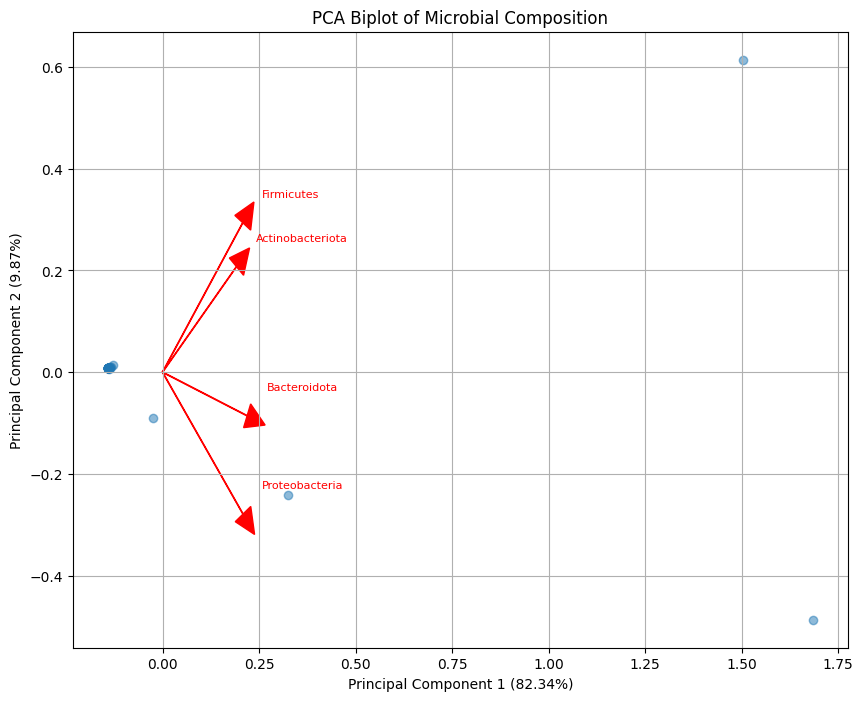

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your data is loaded into a DataFrame called 'phylum_data'
abundance_data = phylum_data.drop(['Taxonomy', 'Tax_detail'], axis=1)  # Exclude unnecessary columns
taxonomy_data = phylum_data['Taxonomy']

# clr trasformation 
abundance_data_clr = clr_transform(abundance_data)

# Perform PCA with 2 components (or the desired number)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(abundance_data_clr)

# Get the top 2 features based on their loading scores
top_features_index = abs(pca.components_).argsort(axis=1)[:, -2:][:, ::-1].flatten()
top_features = abundance_data_clr.columns[top_features_index]

# Plot biplot with only the top 5 features
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Add vectors for top 5 feature loadings with taxonomy labels and feature names
for i, genus in enumerate(top_features):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.05, fc='r', ec='r')

    # Add taxonomy label next to the vector
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05,
             f'{taxonomy_data[i]}', color='r', fontsize=8)

# Add explained variance percentage to xlabel
plt.title('PCA Biplot of Microbial Composition')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid()
plt.show()


c:\Users\Parth Doshi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


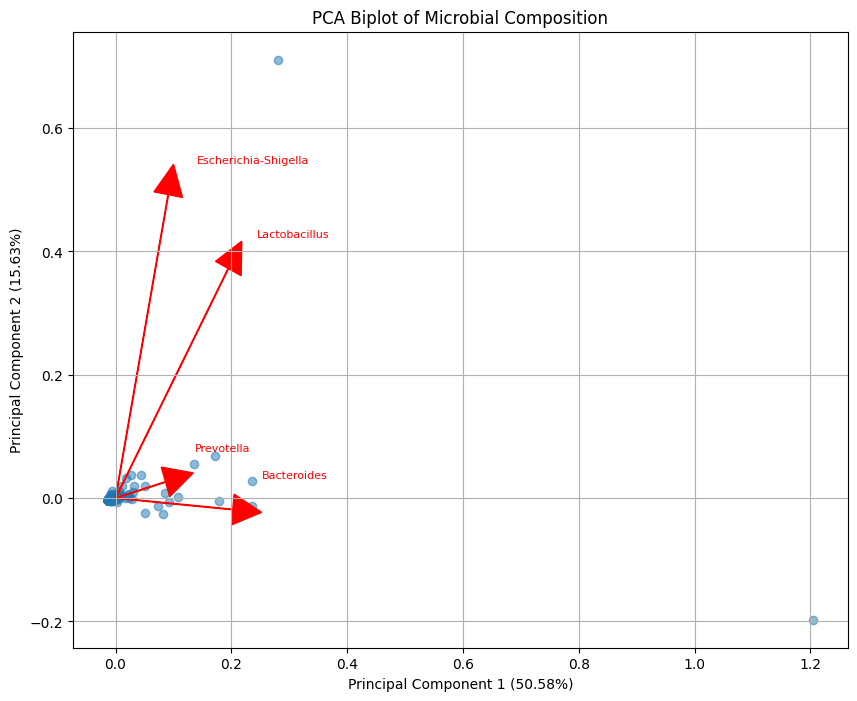

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your data is loaded into a DataFrame called 'phylum_data'
abundance_data = genus_data.drop(['Taxonomy', 'Tax_detail'], axis=1)  # Exclude unnecessary columns
taxonomy_data = genus_data['Taxonomy']

# clr trasformation 
abundance_data_clr = clr_transform(abundance_data)

# Perform PCA with 2 components (or the desired number)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(abundance_data_clr)

# Get the top 5 features based on their loading scores
top_features_index = abs(pca.components_).argsort(axis=1)[:, -2:][:, ::-1].flatten()
top_features = abundance_data_clr.columns[top_features_index]

# Plot biplot with only the top 5 features
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Add vectors for top 5 feature loadings with taxonomy labels and feature names
for i, genus in enumerate(top_features):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.05, fc='r', ec='r')

    # Add taxonomy label next to the vector
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05,
             f'{taxonomy_data[i]}', color='r', fontsize=8)


# Add explained variance percentage to xlabel
plt.title('PCA Biplot of Microbial Composition')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid()
plt.show()


c:\Users\Parth Doshi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


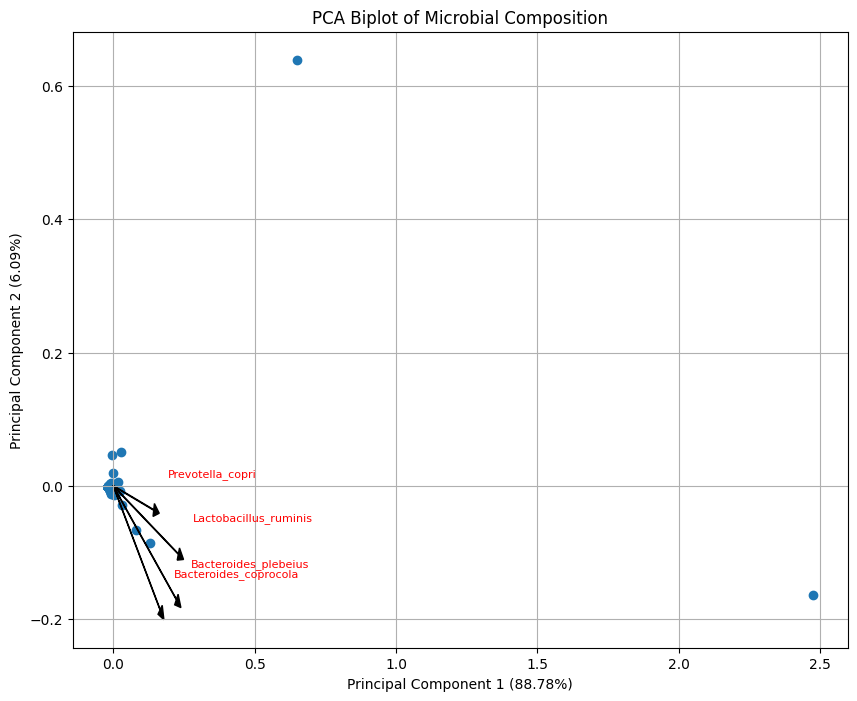

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your data is loaded into a DataFrame called 'phylum_data'
abundance_data = species_data.drop(['Taxonomy', 'Tax_detail'], axis=1)  # Exclude unnecessary columns
taxonomy_data = species_data['Taxonomy']

# clr trasformation 
abundance_data_clr = clr_transform(abundance_data)


# Perform PCA with 2 components (or the desired number)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(abundance_data_clr)

# Get the top 5 features based on their loading scores
top_features_index = abs(pca.components_).argsort(axis=1)[:, -2:][:, ::-1].flatten()
top_features = abundance_data_clr.columns[top_features_index]

# Plot biplot with only the top 5 features
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=1)

# Add vectors for top 5 feature loadings with taxonomy labels and feature names
for i, genus in enumerate(top_features):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.02, head_length=0.02, fc='black', ec='black')

    # Add taxonomy label next to the vector
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05,
             f'{taxonomy_data[i]}', color='r', fontsize=8)


# Add explained variance percentage to xlabel
plt.title('PCA Biplot of Microbial Composition')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid()
plt.show()
